# Lewagon X Femtasy
## Exploratory Data Analysis

### Hard Coded Info

In [1]:
# Dictionary to translate content_type integer into Category
content_type_dict = {1 : 'Soul',
                     2 : 'Sounds',
                     3 : 'Stories',
                     4 : 'Series',
                    }

In [2]:
user_kinks_10 = ['In public', # not in df
                 'At home',
                 'With a stranger',
                 'Authority',
                 'BDSM',
                 'Roleplay',
                 'Quickie',
                 'Group Sex',
                 'Queer',
                 'Toys', # not in df
]

### Import Libraries

In [18]:
import pandas as pd
import numpy as np
from icecream import ic
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read data

In [4]:
path_data = os.path.join('..','raw_data', 'raw_data.xlsx')
df = pd.read_excel(path_data)

In [5]:
df.head()

Status Labels                                      Anonymized ID  \
0  Long-Term Active  3254bdad77021d79710aeba13b47321380560bd28e9294...   
1  Long-Term Active  0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...   
2  Long-Term Active  fdab774f1be31fad01abf50351ec35a855b96a41a51b55...   
3  Long-Term Active  b6193336b972facd129ddaf77a718008748e373a6b579a...   
4  Long-Term Active  3254bdad77021d79710aeba13b47321380560bd28e9294...   

   Anonymized Story IDs  Anonymized Voice IDs Voice Type                Genre  \
0                 31344                  1392     female  Guided Masturbation   
1                 30732                  1344     female  Guided Masturbation   
2                 33108                   672     female  Guided Masturbation   
3                 31344                  1392     female  Guided Masturbation   
4                 31344                  1392     female  Guided Masturbation   

  Language Intensity Story Listen Timestamp      Session Breakups  \
0            Intense    2022-07-15 18:55:29  2022-7-15-First Peak   
1            Intense    2022-07-16 17:18:25       2022-7-16-Early   
2            Intense    2022-07-17 21:09:51   2022-7-17-Late Peak   
3            Intense    2022-07-15 14:31:06       2022-7-15-Early   
4            Intense    2022-07-15 19:03:26  2022-7-15-First Peak   

   Story Release Date  Kinkiness Score Unnamed: 11  Content Types  \
0 2022-01-27 15:10:32              401      Guided              1   
1 2021-12-10 14:55:00              401      Guided              1   
2 2022-04-22 14:57:45              201      Guided              1   
3 2022-01-27 15:10:32              401      Guided              1   
4 2022-01-27 15:10:32              401      Guided              1   

   Story Duration  Play Duration  
0            1203            296  
1            1584             60  
2             800             60  
3            1203             60  
4            1203            458

### Clean data

In [6]:
# Rename unnamed column to 'fantasies'
df = df.rename(columns={'Unnamed: 11': 'fantasies'})

In [7]:
# Split 'Session Breakups' into single parts
df['Session Breakups_date'] = df['Session Breakups'].str[:9]
df['Session Breakups_breakup'] = df['Session Breakups'].str.slice(start=10)

In [8]:
# Split Kinkiness Score
def split_score(df):
    df['user_intensity'] = pd.to_numeric(df['Kinkiness Score'].apply(lambda x: str(x)[0]))
    df['user_kinks'] = pd.to_numeric(df['Kinkiness Score'].apply(lambda x: str(x)[1:]))
    return df

In [9]:
df = split_score(df)

In [10]:
# 
def voice_popularity(df):
    df['voice_popularity'] = df['Anonymized Voice IDs'].apply(lambda x: df['Anonymized Voice IDs'].value_counts()[x])
    return df

check for row-duplicates and remove them

In [11]:
df[df.duplicated()]

Status Labels                                      Anonymized ID  \
85      Long-Term Active  6142ca2b724aa3a3b2209065e97482ede5673751463831...   
86      Long-Term Active  6142ca2b724aa3a3b2209065e97482ede5673751463831...   
117     Long-Term Active  2cdabe4def61d6f60bf9aef63a691c82c769645a1139e3...   
118     Long-Term Active  2cdabe4def61d6f60bf9aef63a691c82c769645a1139e3...   
124     Long-Term Active  6c586b2a574b64a474856d7e5c49f118fd487f944356e9...   
...                  ...                                                ...   
11805  Short-Term Active  9e97ec1a25c35324098829157ecf7fcb243feefc5b4b64...   
11808  Short-Term Active  4b46eb2de01deaa45ee5ff444baccf819883275c7e6c10...   
11815  Short-Term Active  9ac617b17203443d82cf83bc754cf82ea8f2c13296cb9f...   
11824  Short-Term Active  8404d10bb93fab248f899e1d2762b0c7ede963dae6057b...   
11887  Short-Term Active  a5b364e334d46c10f45c1c66d79441d5d45c5efd818520...   

       Anonymized Story IDs  Anonymized Voice IDs Voice Type         Genre  \
85                     6828                  1104     anonym    Sex Sounds   
86                     6828                  1104     anonym    Sex Sounds   
117                    6828                  1104     anonym    Sex Sounds   
118                    6828                  1104     anonym    Sex Sounds   
124                   31224                  1104     anonym    Sex Sounds   
...                     ...                   ...        ...           ...   
11805                 27024                  1080       male     Phone Sex   
11808                 32544                  2808       male     Phone Sex   
11815                 25920                  3000       male     Phone Sex   
11824                 32136                  2808       male     Phone Sex   
11887                 25308                  3072       male  Love Letters   

      Language Intensity Story Listen Timestamp      Session Breakups  \
85               Intense    2022-07-15 14:52:44       2022-7-15-Early   
86               Intense    2022-07-15 14:52:44       2022-7-15-Early   
117              Intense    2022-07-15 22:24:23   2022-7-15-Late Peak   
118              Intense    2022-07-15 22:24:23   2022-7-15-Late Peak   
124              Intense    2022-07-15 11:47:27       2022-7-15-Early   
...                  ...                    ...                   ...   
11805              Rough    2022-07-17 13:48:33       2022-7-17-Early   
11808              Rough    2022-07-17 19:31:18  2022-7-17-First Peak   
11815              Rough    2022-07-17 22:31:31   2022-7-17-Late Peak   
11824              Rough    2022-07-18 11:09:56       2022-7-18-Early   
11887               Soft    2022-07-19 21:25:34   2022-7-19-Late Peak   

       Story Release Date  Kinkiness Score    fantasies  Content Types  \
85    2019-04-26 10:30:46              402      Quickie              2   
86    2019-04-26 10:30:46              402      Quickie              2   
117   2019-04-26 10:30:46              402      Quickie              2   
118   2019-04-26 10:30:46              402      Quickie              2   
124   2022-01-19 11:08:37              502      At home              2   
...                   ...              ...          ...            ...   
11805 2021-06-03 15:05:30              501      At home              3   
11808 2022-06-15 13:00:00              301    Group sex              3   
11815 2020-10-29 17:00:00              201        Phone              3   
11824 2022-04-01 13:00:00              101  Doggy style              3   
11887 2020-10-08 08:00:03              102    Self-Love              1   

       Story Duration  Play Duration Session Breakups_date  \
85                207            207             2022-7-15   
86                207            207             2022-7-15   
117               207            148             2022-7-15   
118               207            148             2022-7-15   
124               617            347             

In [12]:
df = df.drop_duplicates()
df

Status Labels                                      Anonymized ID  \
0       Long-Term Active  3254bdad77021d79710aeba13b47321380560bd28e9294...   
1       Long-Term Active  0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...   
2       Long-Term Active  fdab774f1be31fad01abf50351ec35a855b96a41a51b55...   
3       Long-Term Active  b6193336b972facd129ddaf77a718008748e373a6b579a...   
4       Long-Term Active  3254bdad77021d79710aeba13b47321380560bd28e9294...   
...                  ...                                                ...   
12021  Short-Term Active  e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...   
12022  Short-Term Active  4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...   
12023  Short-Term Active  a747ec6ab408692145f8435da174c10b3cd888459287c7...   
12024  Short-Term Active  0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...   
12025  Short-Term Active  599980edecb84621fe38d5c9d770a371536f5587996d46...   

       Anonymized Story IDs  Anonymized Voice IDs Voice Type  \
0                     31344                  1392     female   
1                     30732                  1344     female   
2                     33108                   672     female   
3                     31344                  1392     female   
4                     31344                  1392     female   
...                     ...                   ...        ...   
12021                 27192                  1248       male   
12022                 27192                  1248       male   
12023                 22224                   336       male   
12024                 27192                  1248       male   
12025                 30060                   336       male   

                     Genre Language Intensity Story Listen Timestamp  \
0      Guided Masturbation            Intense    2022-07-15 18:55:29   
1      Guided Masturbation            Intense    2022-07-16 17:18:25   
2      Guided Masturbation            Intense    2022-07-17 21:09:51   
3      Guided Masturbation            Intense    2022-07-15 14:31:06   
4      Guided Masturbation            Intense    2022-07-15 19:03:26   
...                    ...                ...                    ...   
12021            Phone Sex               Soft    2022-07-17 00:03:08   
12022            Phone Sex               Soft    2022-07-18 14:56:26   
12023            Phone Sex               Soft    2022-07-19 00:16:38   
12024            Phone Sex               Soft    2022-07-19 13:48:53   
12025            Phone Sex               Soft    2022-07-19 21:26:57   

           Session Breakups  Story Release Date  Kinkiness Score fantasies  \
0      2022-7-15-First Peak 2022-01-27 15:10:32              401    Guided   
1           2022-7-16-Early 2021-12-10 14:55:00              401    Guided   
2       2022-7-17-Late Peak 2022-04-22 14:57:45              201    Guided   
3           2022-7-15-Early 2022-01-27 15:10:32              401    Guided   
4      2022-7-15-First Peak 2022-01-27 15:10:32              401    Guided   
...                     ...                 ...              ...       ...   
12021   2022-7-16-Late Peak 2021-06-12 13:00:00              201     Phone   
12022       2022-7-18-Early 2021-06-12 13:00:00              201     Phone   
12023   2022-7-18-Late Peak 2020-11-15 17:00:00              201   At home   
12024       2022-7-19-Early 2021-06-12 13:00:00              201     Phone   
12025   2022-7-19-Late Peak 2021-10-22 13:46:08              201     Phone   

       Content Types  Story Duration  Play Duration Session Breakups_date  \
0                  1            1203            296             2022-7-15   
1                  1            1584             60             2022-7-16   
2                  1             800             60             2022-7-17   
3                  1            1203             60             2022-7-15   
4                  1            1203            458             2022-7-15   
...              ...         

### Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 12025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Status Labels             11592 non-null  object        
 1   Anonymized ID             11592 non-null  object        
 2   Anonymized Story IDs      11592 non-null  int64         
 3   Anonymized Voice IDs      11592 non-null  int64         
 4   Voice Type                11592 non-null  object        
 5   Genre                     11592 non-null  object        
 6   Language Intensity        11592 non-null  object        
 7   Story Listen Timestamp    11592 non-null  datetime64[ns]
 8   Session Breakups          11592 non-null  object        
 9   Story Release Date        11592 non-null  datetime64[ns]
 10  Kinkiness Score           11592 non-null  int64         
 11  fantasies                 11592 non-null  object        
 12  Content Types     

In [39]:
df[df['user_kinks'].isnull()]

Status Labels                                      Anonymized ID  \
4413    Long-Term Active  9964bde8e0360af6d79b469610d2ca83fa959e52c20801...   
4417    Long-Term Active  ac09f0258f5d357eee7d91a9dd05c7810753041911e062...   
4698    Long-Term Active  74c5842b9bd812b9419aaacebd6b4785869e8f4fd901fa...   
4699    Long-Term Active  853b51d25bdd42e4d7ce2bc6965700cb9ca9e94a17730a...   
4705    Long-Term Active  a200a0d34bc69b9336160f429e21164488ccea542302d4...   
4888    Long-Term Active  63cc8e4734019e7c5853675038b0a15d9bc6b6de2665a7...   
5167    Long-Term Active  74c5842b9bd812b9419aaacebd6b4785869e8f4fd901fa...   
5175    Long-Term Active  a200a0d34bc69b9336160f429e21164488ccea542302d4...   
8755   Short-Term Active  9280857a77e26013adb1c65059776a1dc0c499ba3ac9da...   
11011  Short-Term Active  5ccb8e5c45f6b89c722e7e7e30b859a78afeae6f8f1517...   
11012  Short-Term Active  5ccb8e5c45f6b89c722e7e7e30b859a78afeae6f8f1517...   
11013  Short-Term Active  1e2793d5643f9c6fc3733859dc2a3b6a5ac71f999e12bb...   
11014  Short-Term Active  dcd35c7a9d6198323c18b441da74cb1d6d7f38509fade6...   
11015  Short-Term Active  29e105acccef40b15c68e89ebc54fa7766fdba1d226542...   
11017  Short-Term Active  894aaabed0e17982b334d2fa5a2c9203445aa688911efa...   
11018  Short-Term Active  0b7c079ca397510d700118ba86d7dec391e29476e3d7e5...   
11019  Short-Term Active  b91a8cfc97fb67c177c77d47fce69fcf6a4349159d36c7...   
11020  Short-Term Active  e01ce2b4a14f549dedd8eda01e2f956c273e190bb631b4...   
11021  Short-Term Active  6b7db9eeab292b486c07974a4ca3d2924f1f11b52e4342...   
11025  Short-Term Active  54dc3ce5f21a614336dbd3fbdf98bdf837bc0ad5640098...   
11034  Short-Term Active  a8ebb552a77678c5cc1621fe07928ed4f7105e4a987667...   
11353  Short-Term Active  5ccb8e5c45f6b89c722e7e7e30b859a78afeae6f8f1517...   
11354  Short-Term Active  feb42281bd46949c99f82867e97c912fbf64f2c30daf27...   
11355  Short-Term Active  a6a2ff51c71b2f5a666cce71281520058d0f37b8756dea...   
11356  Short-Term Active  9378749272a5ed1d3cb374e3619eb825e413c6cb882767...   
11357  Short-Term Active  a8f2a1db495ab542e98200985f18c74b2a3e63efb288ce...   
11358  Short-Term Active  1e2793d5643f9c6fc3733859dc2a3b6a5ac71f999e12bb...   
11359  Short-Term Active  894aaabed0e17982b334d2fa5a2c9203445aa688911efa...   
11360  Short-Term Active  a2ce542a631b748185adc4456012360caa1a4aa8c8ccdc...   
11361  Short-Term Active  87e4edd7bac58ecab1c37c1bc641853e703d767acde6ee...   
11370  Short-Term Active  87e4edd7bac58ecab1c37c1bc641853e703d767acde6ee...   
11374  Short-Term Active  3f08722f3764a3c668fadfc91ab649540e7624680f585f...   
11528  Short-Term Active  5ccb8e5c45f6b89c722e7e7e30b859a78afeae6f8f1517...   
11529  Short-Term Active  05c524d8c059a7891f7edf24f7863144fc0e73392be42a...   
11530  Short-Term Active  afc927d9a2ae548e1d41ba1ae25b26663e83c375340f85...   
11531  Short-Term Active  3f08722f3764a3c668fadfc91ab649540e7624680f585f...   
11532  Short-Term Active  c41f457186782bfa81c4f24e97ed07fc835c70c7dab865...   
11534  Short-Term Active  9378749272a5ed1d3cb374e3619eb825e413c6cb882767...   
11535  Short-Term Active  6b7db9eeab292b486c07974a4ca3d2924f1f11b52e4342...   
11536  Short-Term Active  87e4edd7bac58ecab1c37c1bc641853e703d767acde6ee...   
11544  Short-Term Active  d8224a4161dc117cbb515580caa3a4daa2399fdb46e2b4...   
11548  Short-Term Active  47631d6797e0508a00bb0b0276975d05b0025a303f2295...   
11863  Short-Term Active  5ccb8e5c45f6b89c722e7e7e30b859a78afeae6f8f1517...   
11864  Short-Term Active  d9520848ce3c6abbbcd42f8068fb287249235ccd91e845...   
11865  Short-Term Active  2777485efcb43b119b1f99c721500e9218155b524c2664...   
11866  Short-Term Active  787fc6f5cc41fc917f94459b552462066f94a4c0ba32a0...   
11867  Short-Term Active  9378749272a5ed1d3cb374e3619eb825e413c6cb882767...   
11869  Short-Term Active  a747ec6ab408692145f8435da174c10b3cd888459287c7...   
11870  Short-Term Active  a2ce542a631b748185adc4456012360caa1a4aa8c8ccdc...   
11871  Short-Term Active  a8ebb552a77678c5cc1621fe07928ed4f71

In [14]:
df.describe()

Anonymized Story IDs  Anonymized Voice IDs  Kinkiness Score  \
count          11592.000000          11592.000000     11592.000000   
mean           25241.127329           1519.585921       420.411318   
std            10684.723115           1395.666472       114.226171   
min              144.000000            120.000000         1.000000   
25%            21792.000000            336.000000       401.000000   
50%            30396.000000           1104.000000       501.000000   
75%            33252.000000           3096.000000       501.000000   
max            34128.000000           4320.000000       510.000000   

       Content Types  Story Duration  Play Duration  user_intensity  \
count   11592.000000    11592.000000   11592.000000    11592.000000   
mean        2.592046      606.707039     294.461525        4.200569   
std         0.624451      320.004087     298.722726        1.113547   
min         1.000000       85.000000      60.000000        1.000000   
25%         2.000000      358.000000      60.000000        4.000000   
50%         3.000000      557.000000     169.000000        5.000000   
75%         3.000000      800.000000     442.000000        5.000000   
max         4.000000     2240.000000    1805.000000        5.000000   

         user_kinks  
count  11540.000000  
mean       1.608492  
std        0.981904  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       10.000000

In [15]:
df['Session Breakups_breakup'].value_counts()

Early         4563
Late Peak     2966
First Peak    2196
OFF           1867
Name: Session Breakups_breakup, dtype: int64

### Data facts

In [16]:
user_count = df['Anonymized ID'].nunique()
actor_count = df['Anonymized Voice IDs'].nunique()
#actor_count

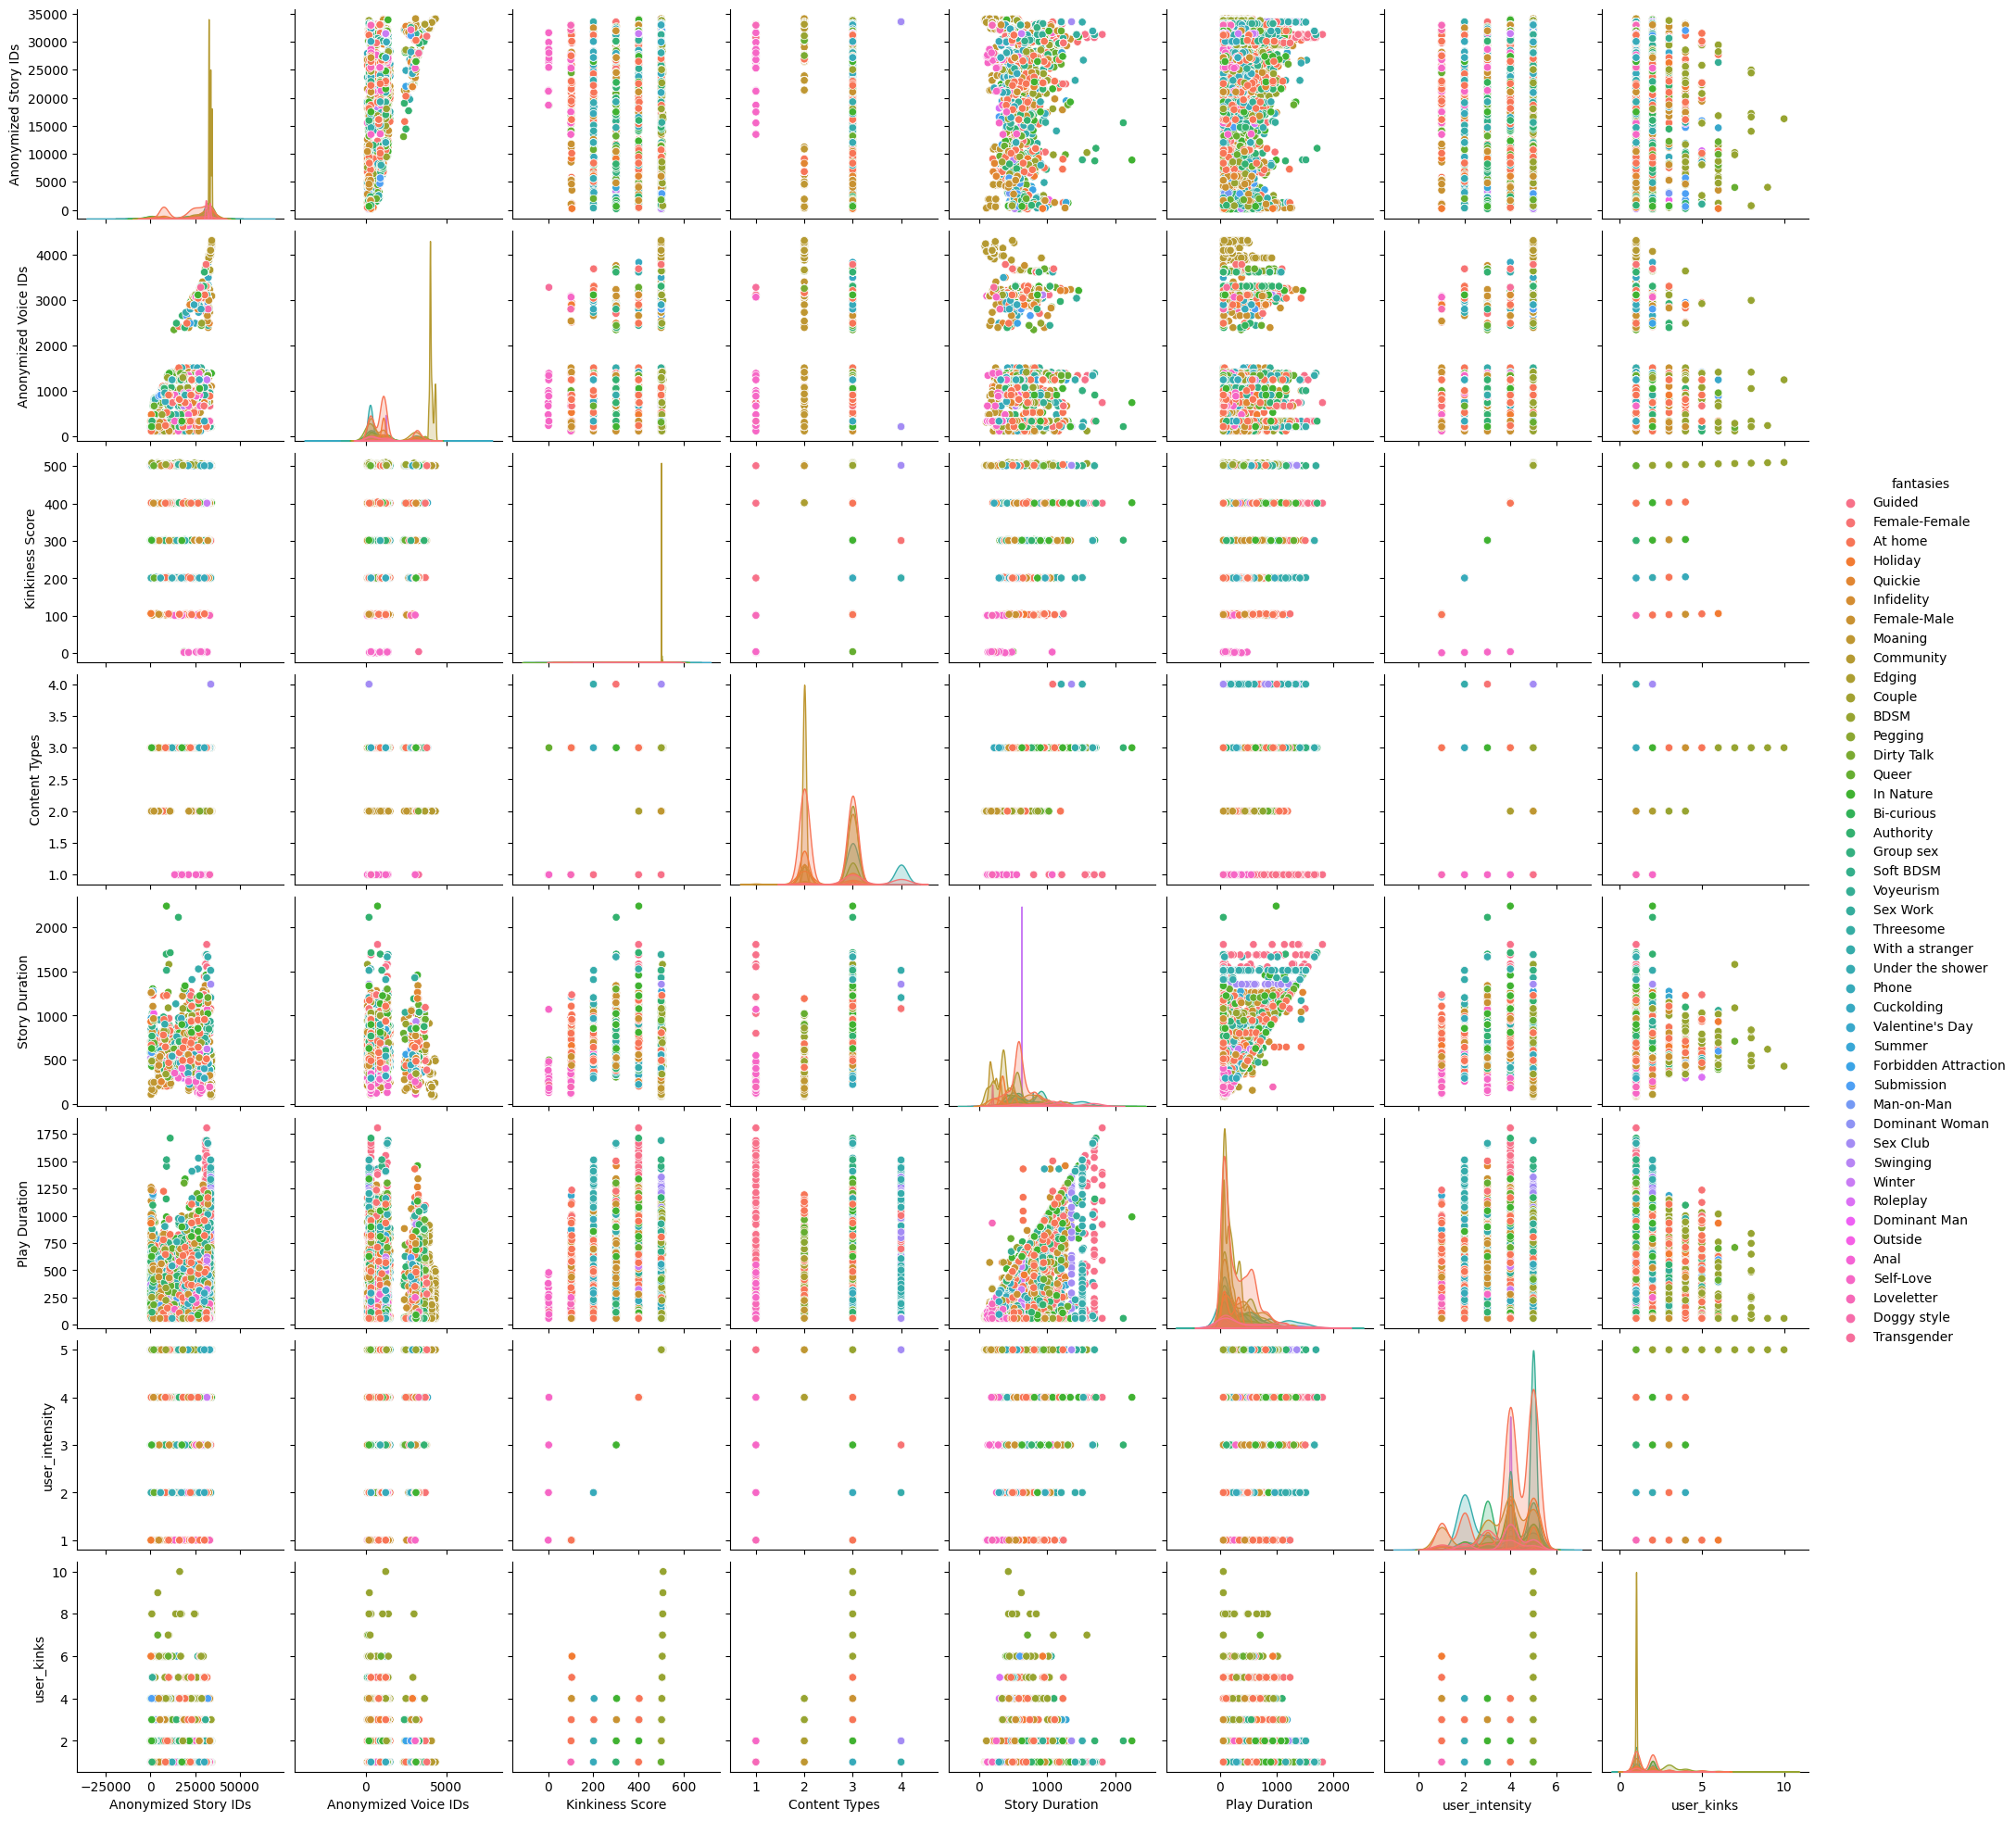

In [31]:
sns.pairplot(data=df, hue='fantasies')

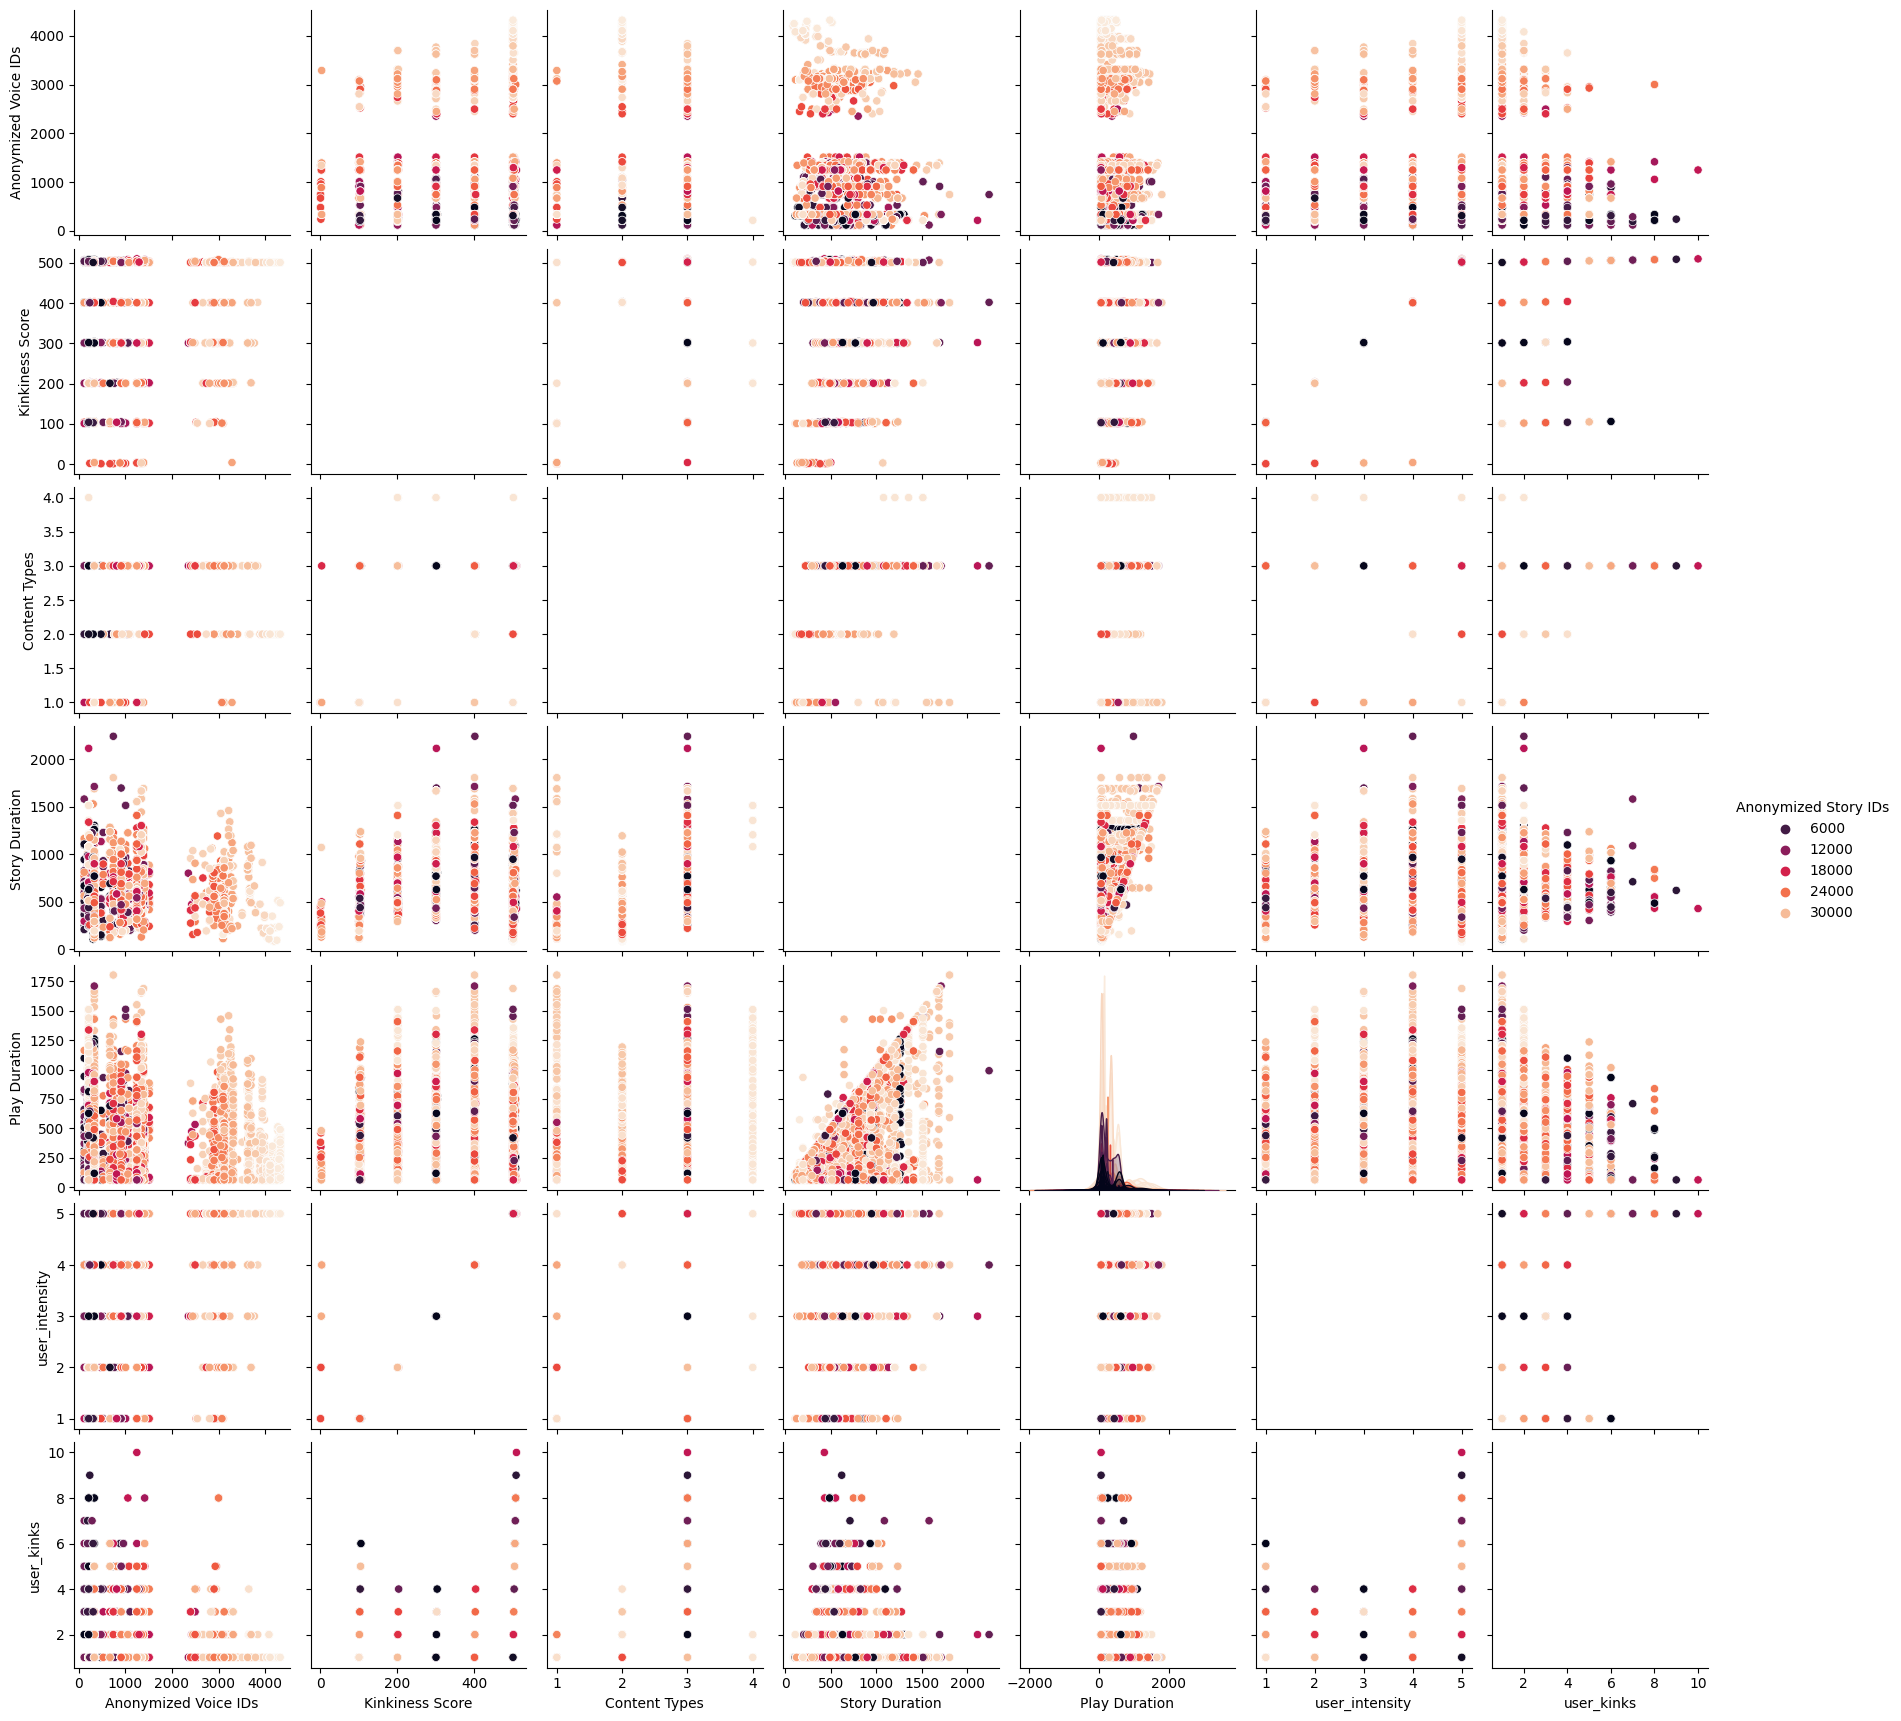

In [32]:
sns.pairplot(data=df, hue='Anonymized Story IDs', palette='rocket')

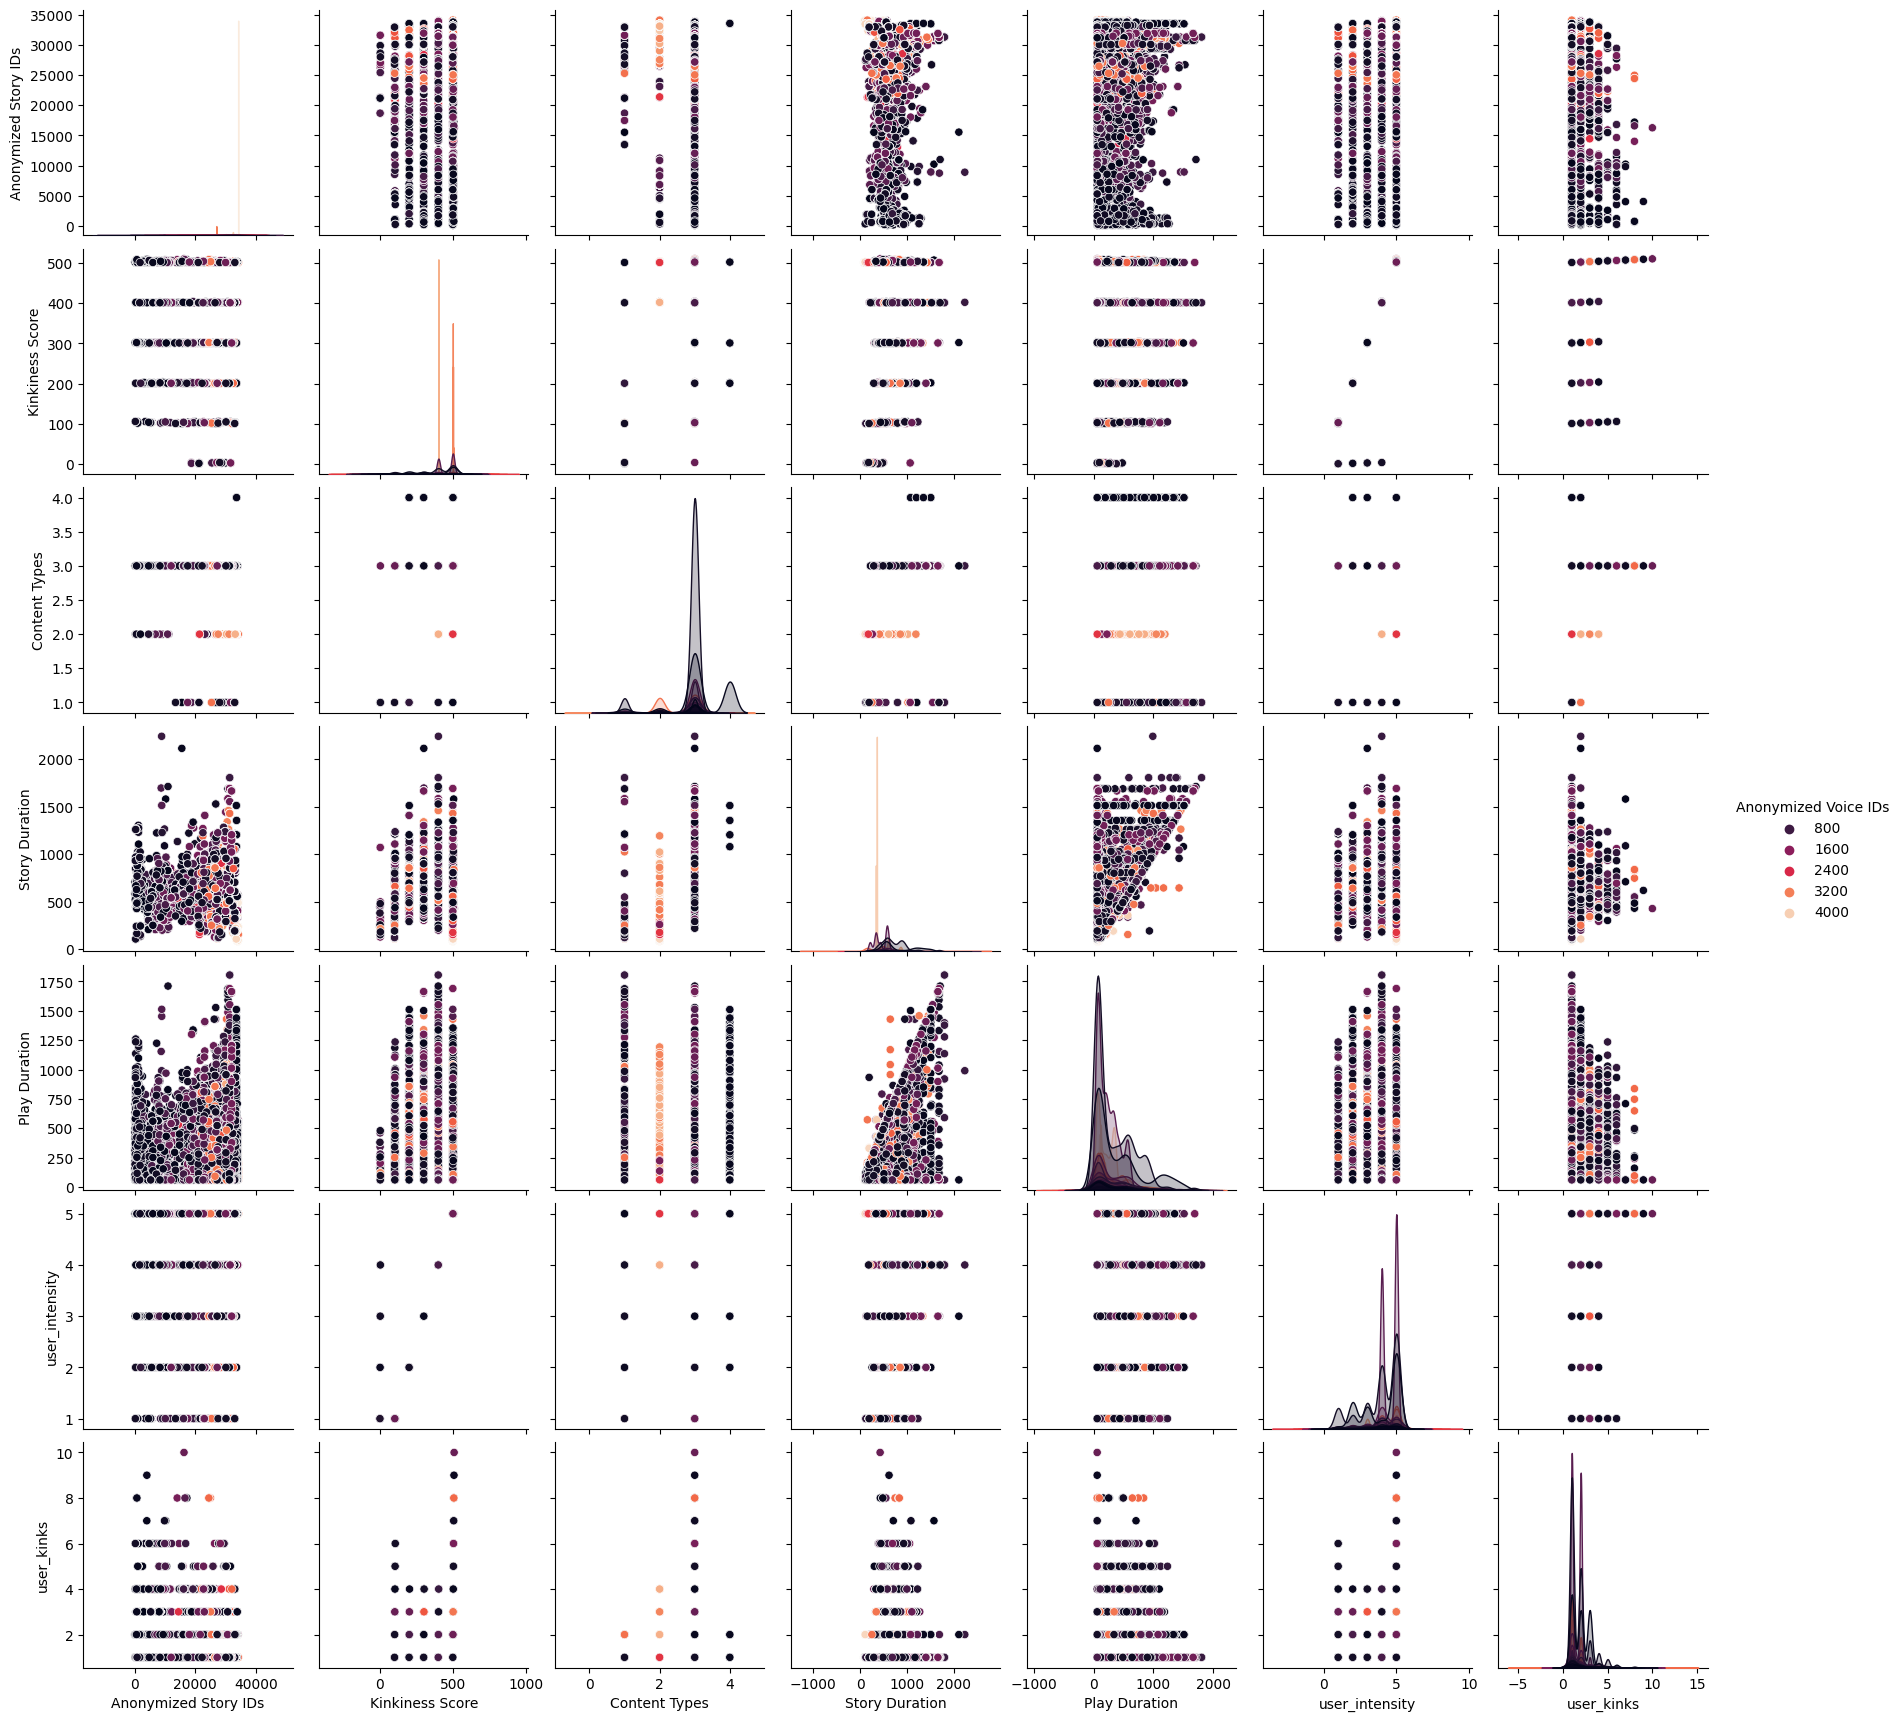

In [33]:
sns.pairplot(data=df, hue='Anonymized Voice IDs', palette='rocket')

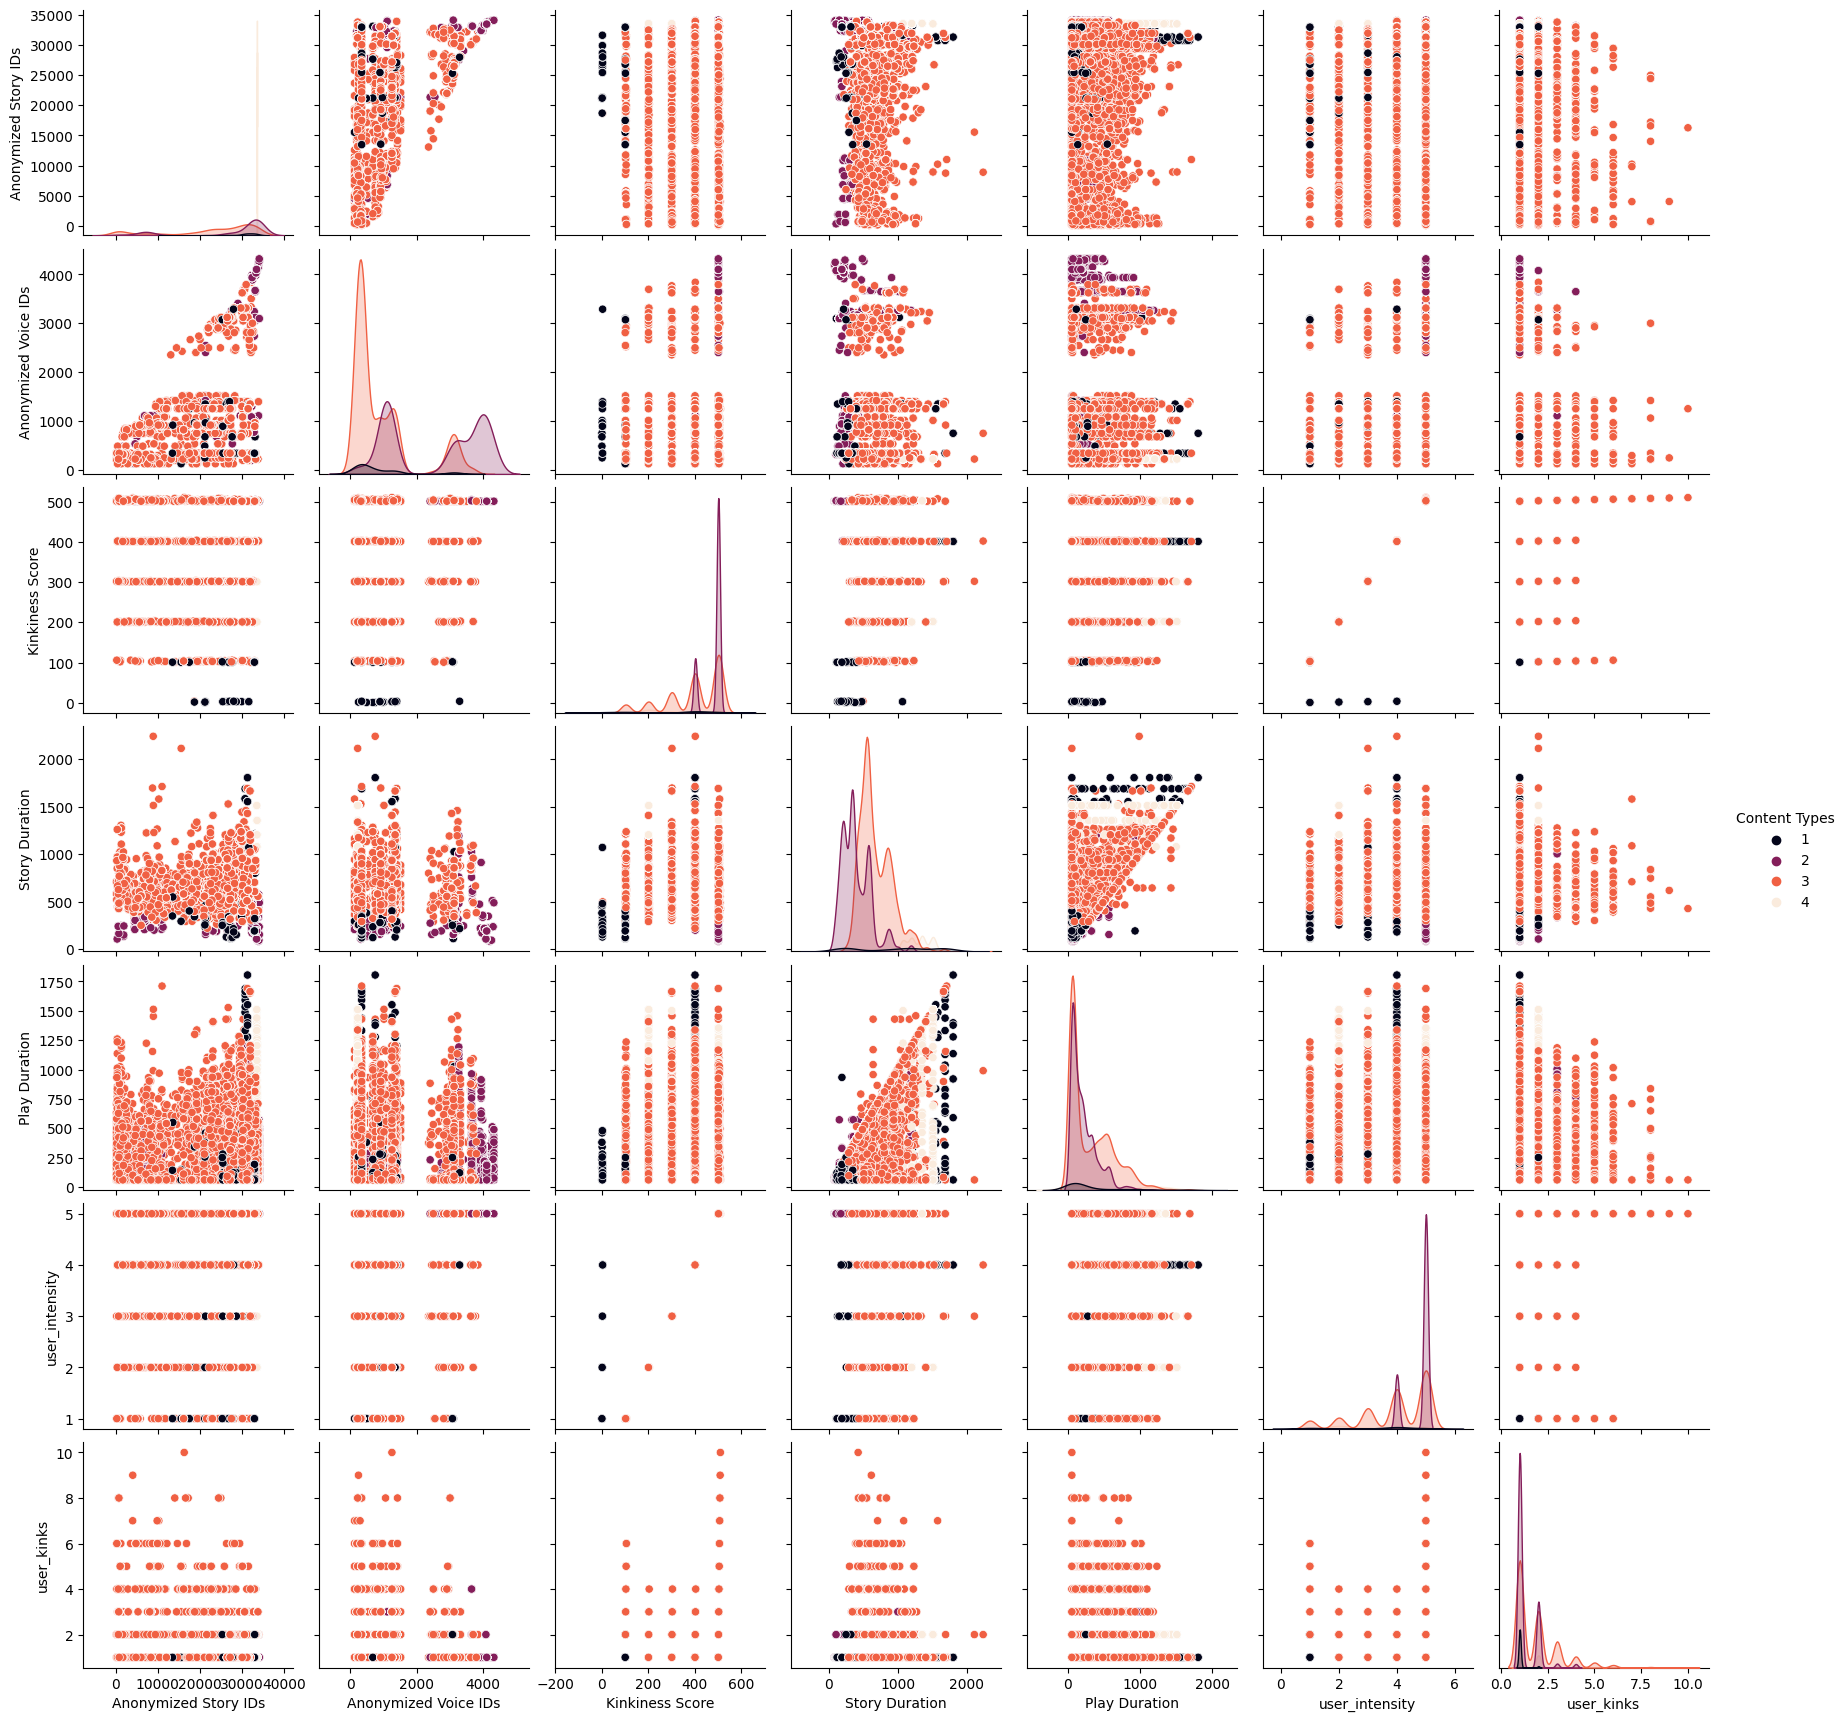

In [34]:
sns.pairplot(data=df, hue='Content Types', palette='rocket')

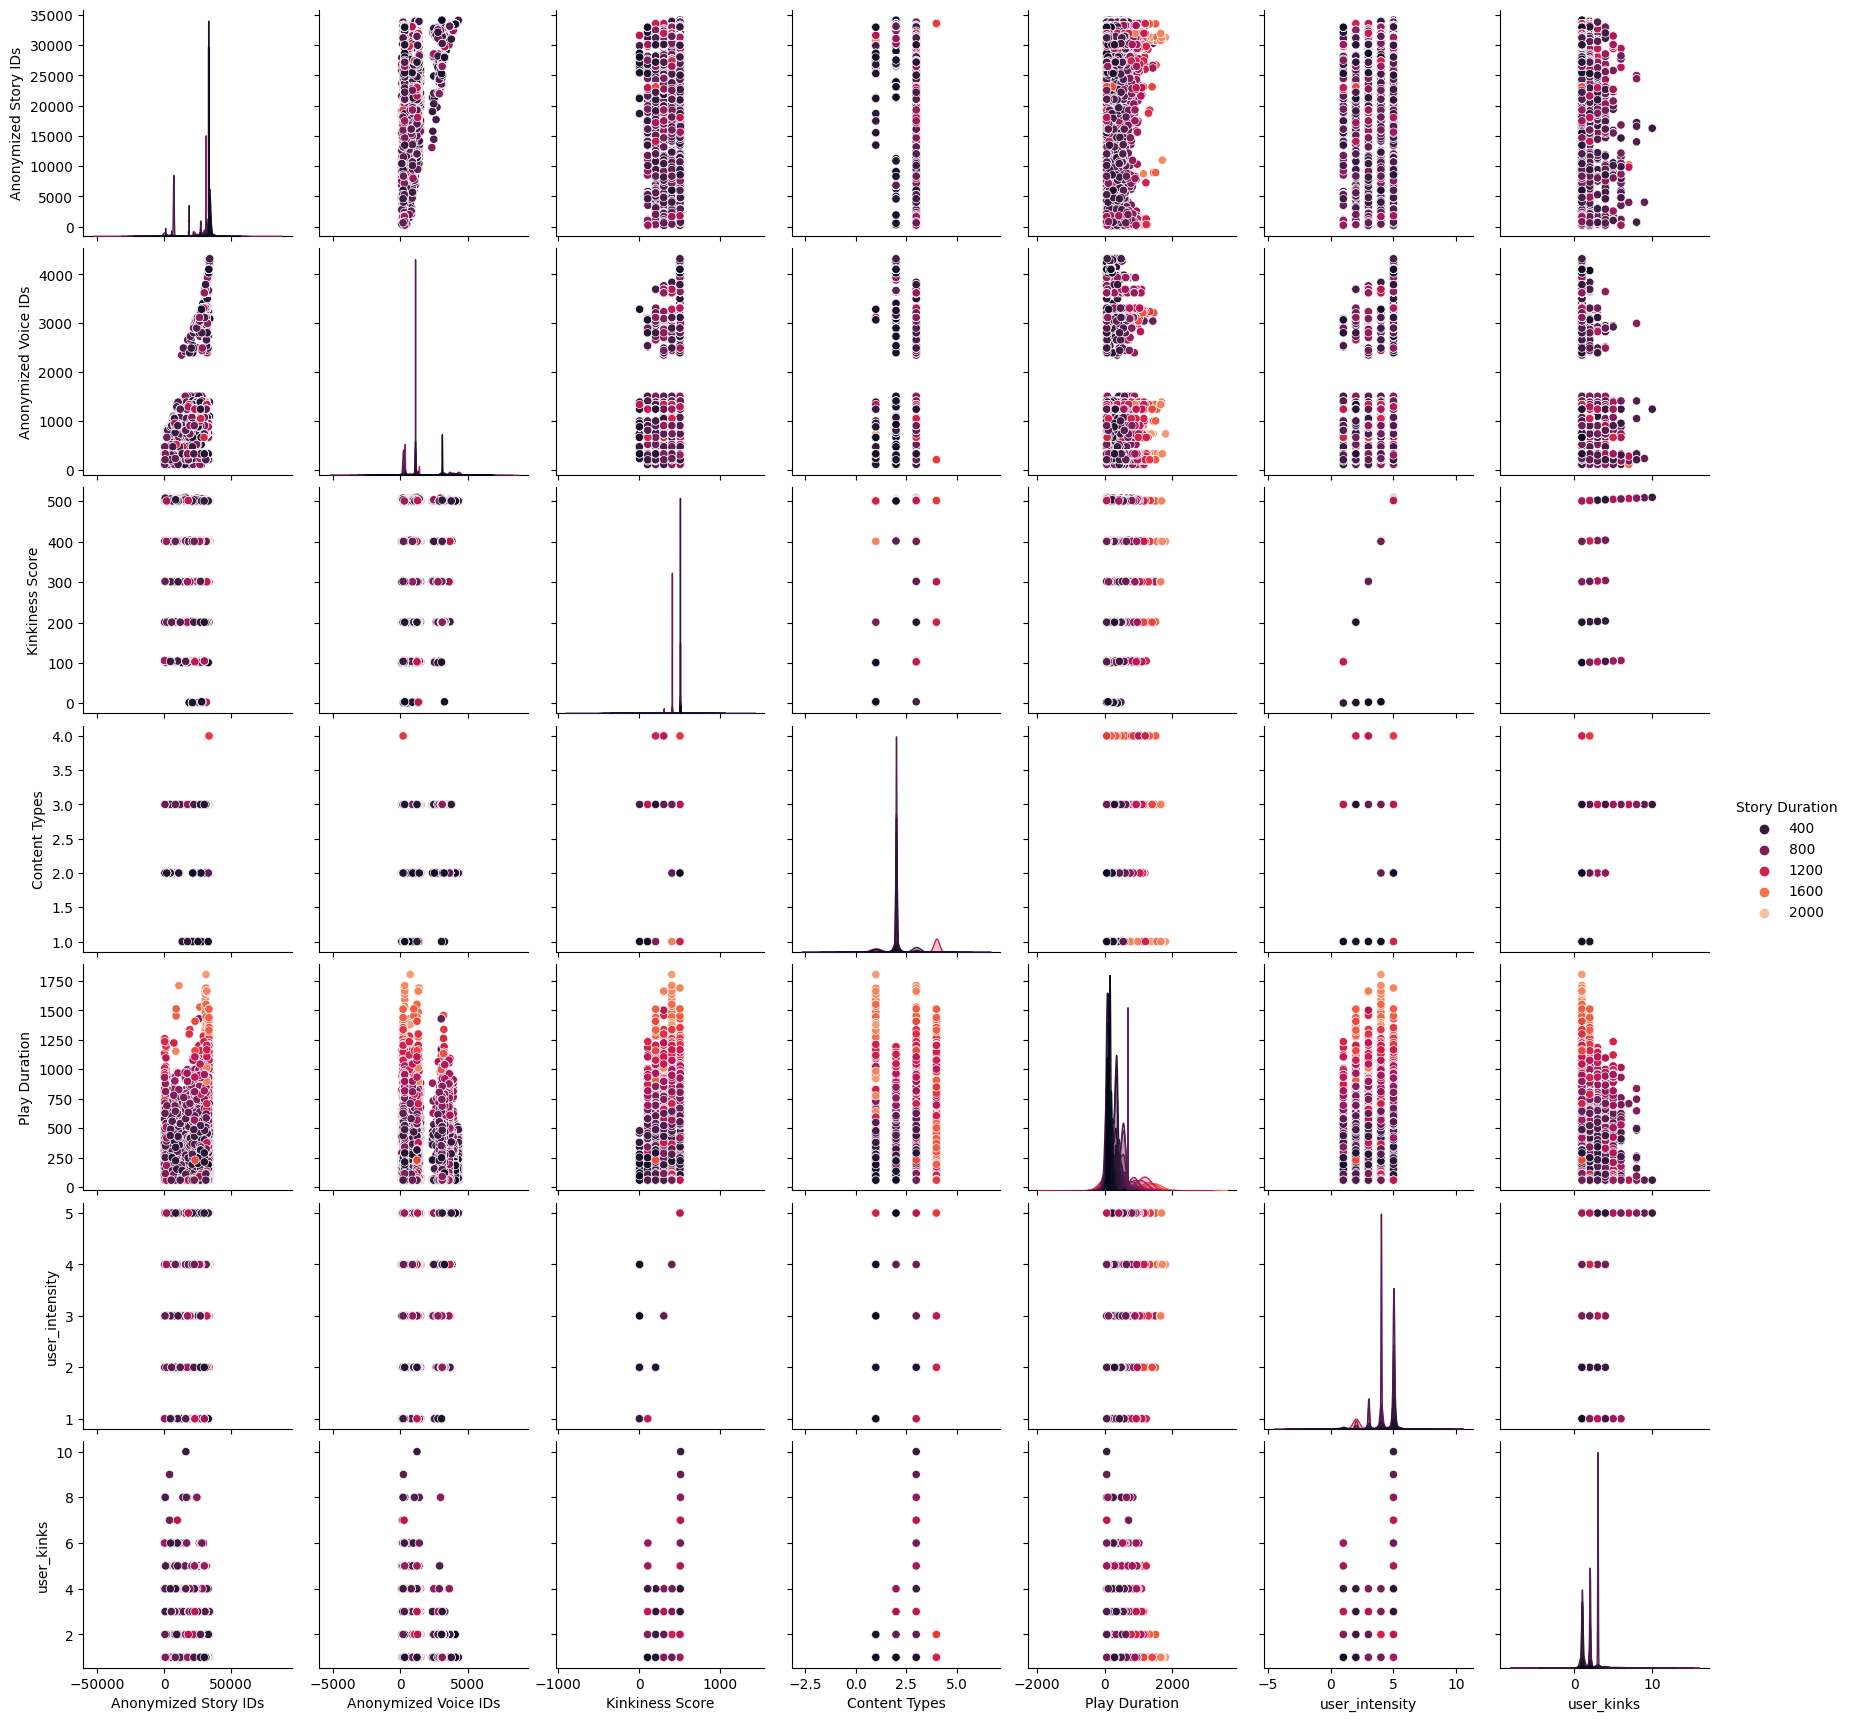

In [35]:
sns.pairplot(data=df, hue='Story Duration', palette='rocket')

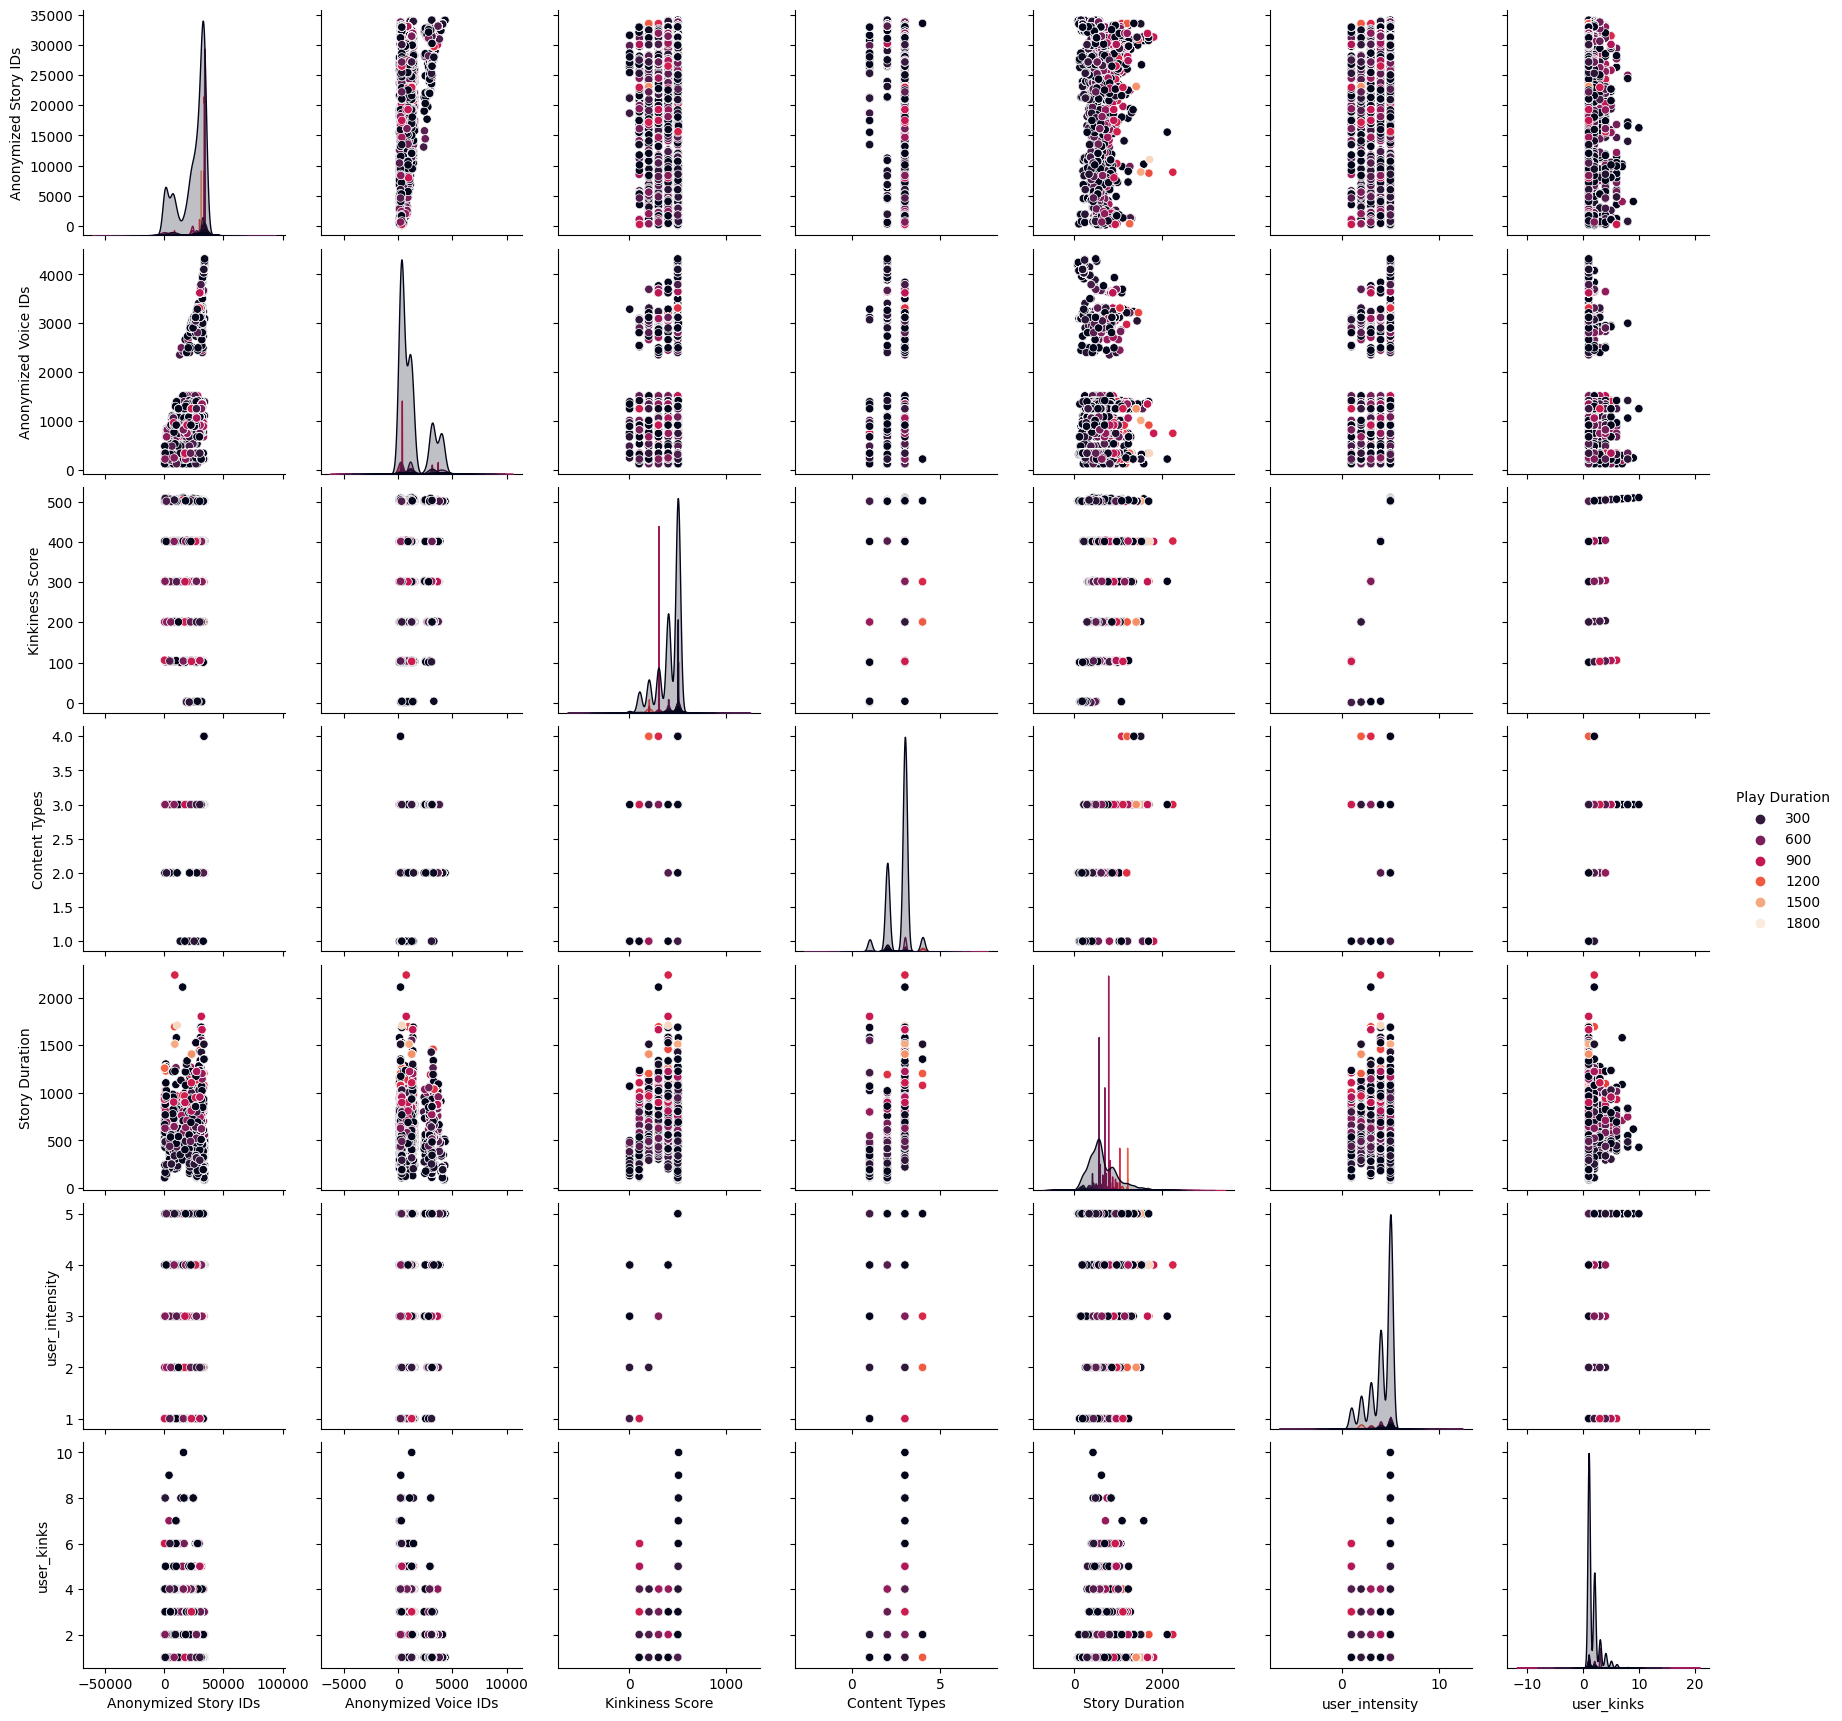

In [36]:
sns.pairplot(data=df, hue='Play Duration', palette='rocket')

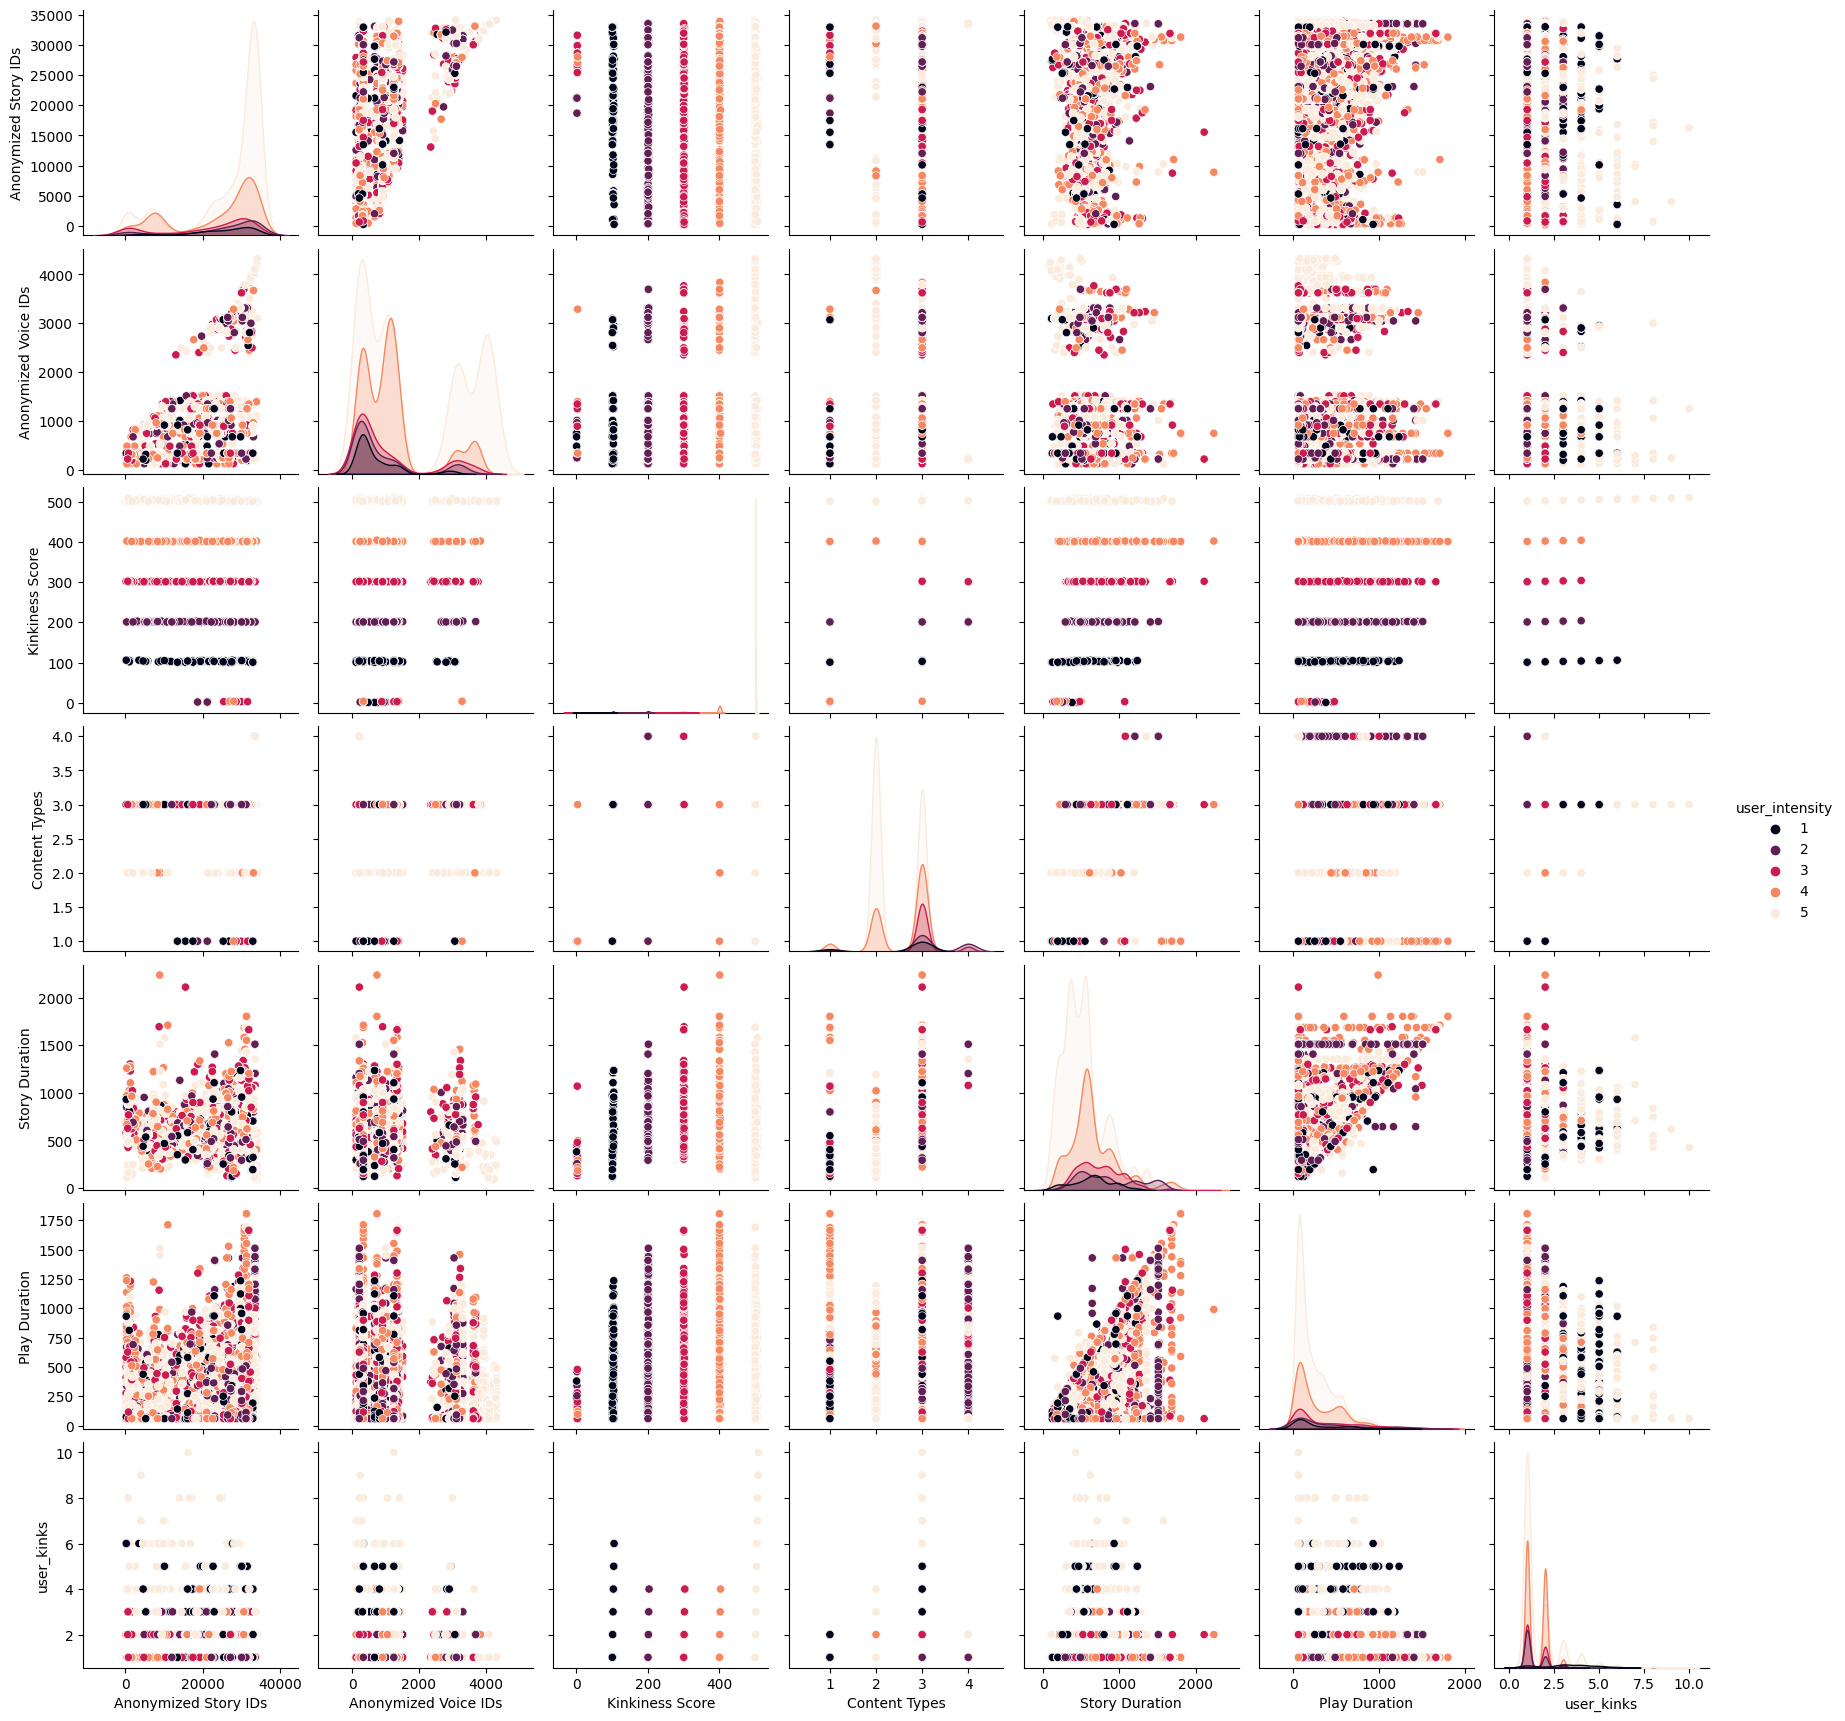

In [37]:
sns.pairplot(data=df, hue='user_intensity', palette='rocket')

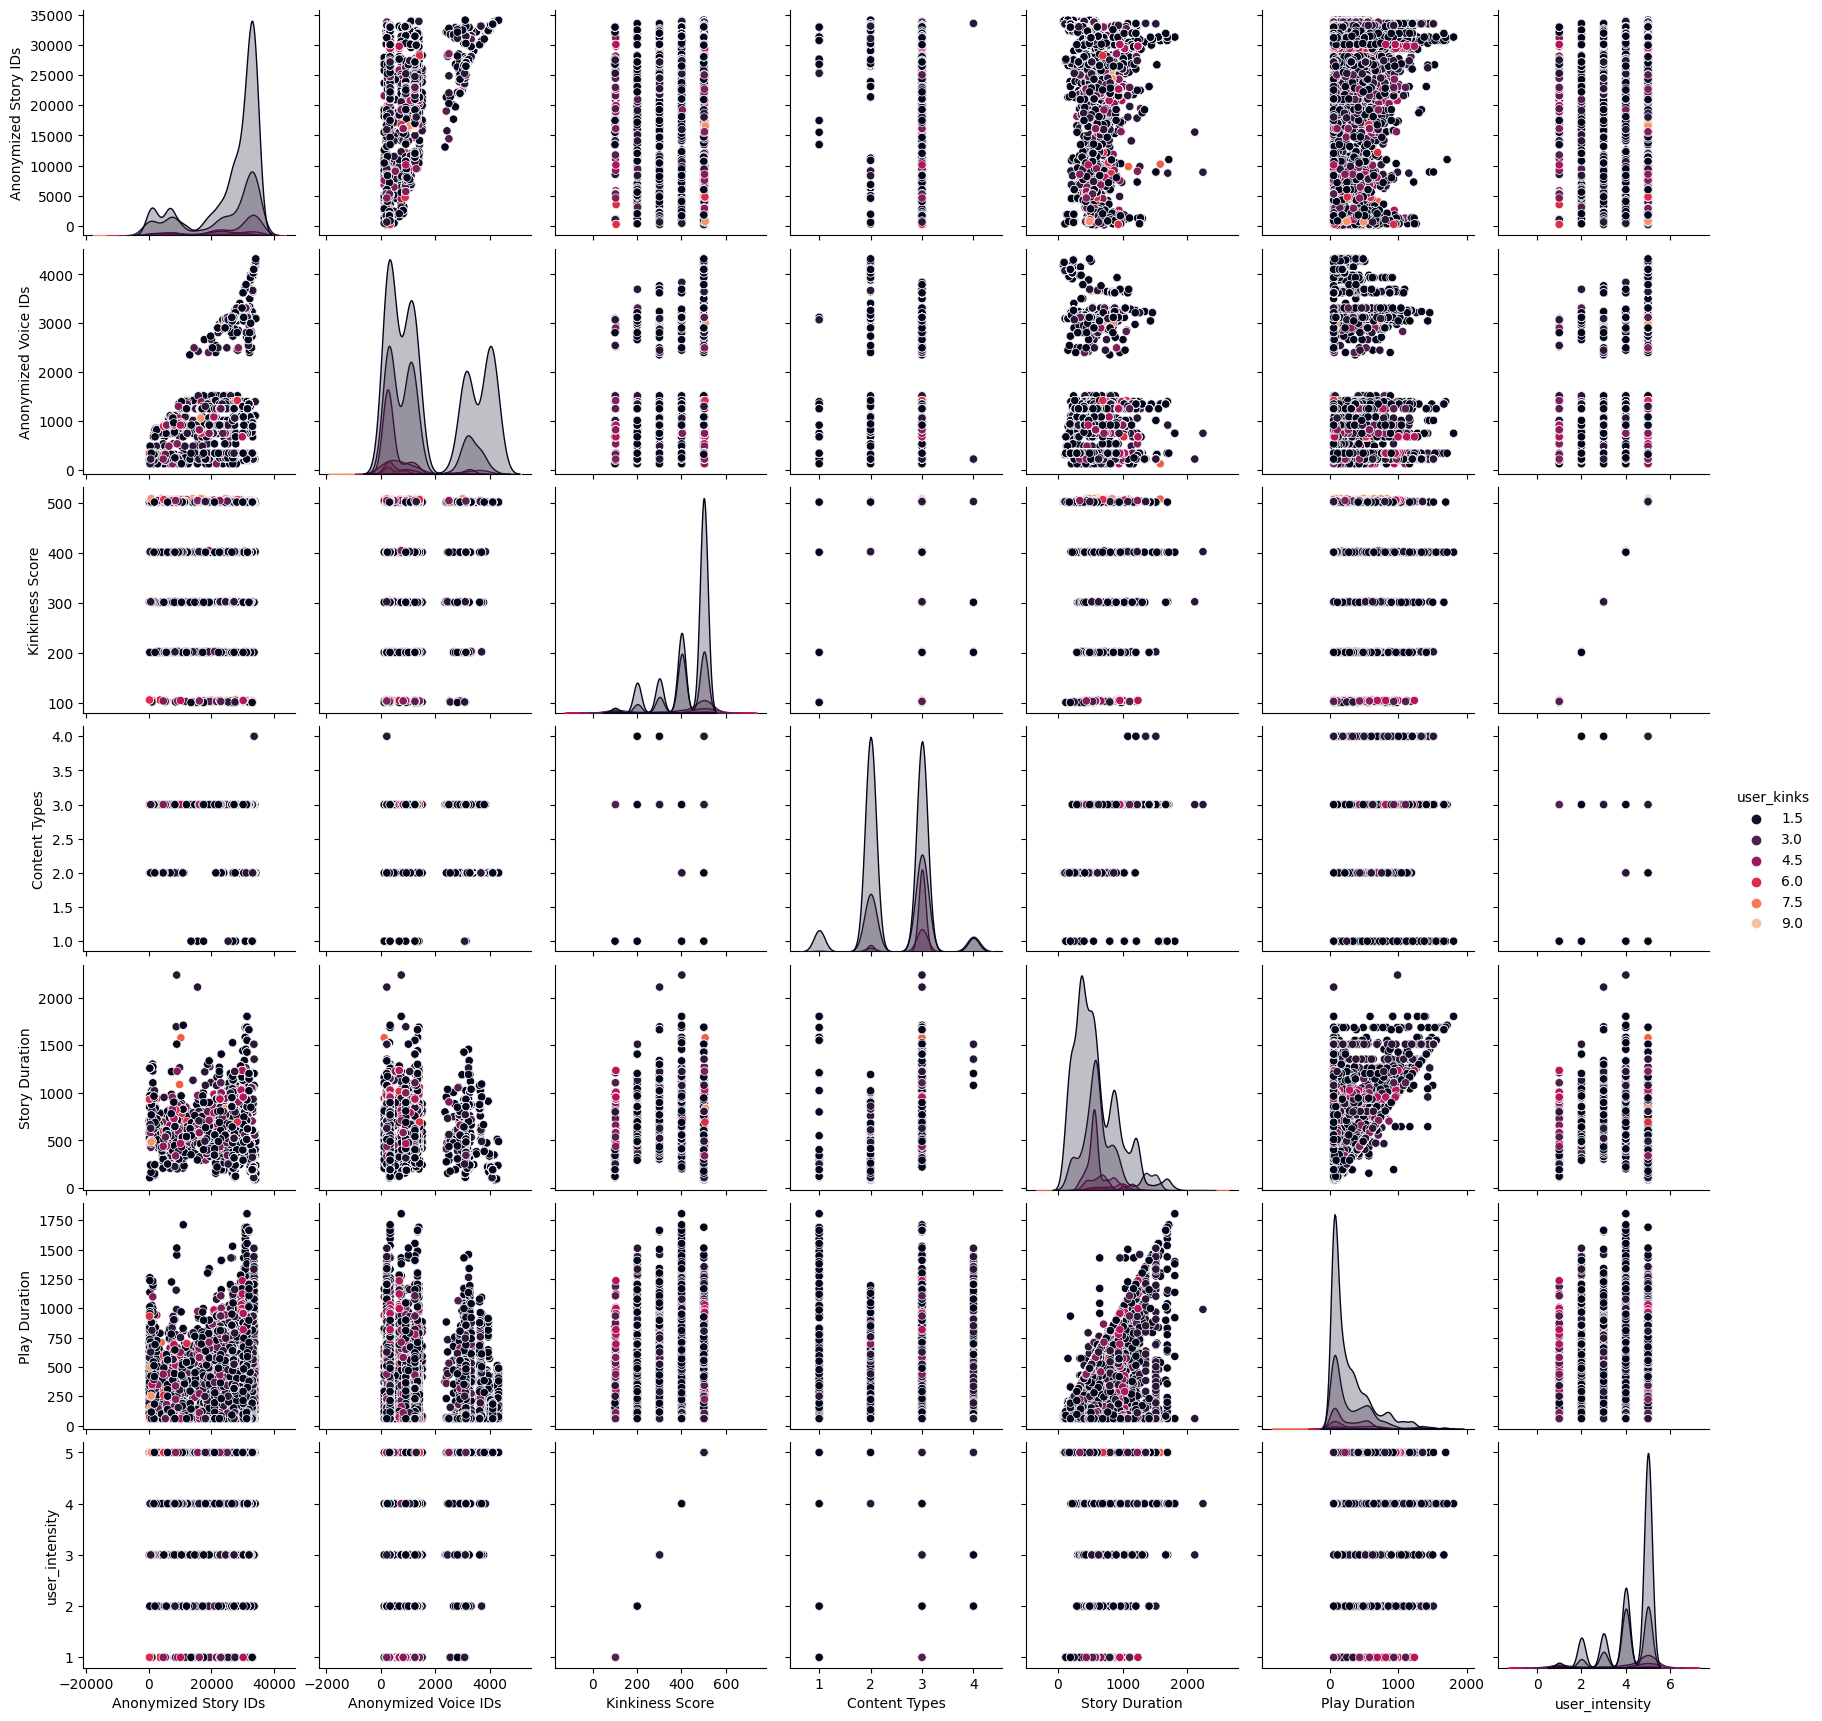

In [38]:
sns.pairplot(data=df, hue='user_kinks', palette='rocket')

In [51]:
df.corr().round(2)

Anonymized Story IDs  Anonymized Voice IDs  \
Anonymized Story IDs                  1.00                  0.38   
Anonymized Voice IDs                  0.38                  1.00   
Kinkiness Score                       0.11                  0.28   
Content Types                        -0.14                 -0.46   
Story Duration                        0.05                 -0.34   
Play Duration                         0.03                 -0.12   
user_intensity                        0.11                  0.28   
user_kinks                           -0.14                 -0.25   

                      Kinkiness Score  Content Types  Story Duration  \
Anonymized Story IDs             0.11          -0.14            0.05   
Anonymized Voice IDs             0.28          -0.46           -0.34   
Kinkiness Score                  1.00          -0.26           -0.26   
Content Types                   -0.26           1.00            0.42   
Story Duration                  -0.26           0.42            1.00   
Play Duration                   -0.13           0.21            0.42   
user_intensity                   0.99          -0.29           -0.28   
user_kinks                      -0.11           0.25            0.11   

                      Play Duration  user_intensity  user_kinks  
Anonymized Story IDs           0.03            0.11       -0.14  
Anonymized Voice IDs          -0.12            0.28       -0.25  
Kinkiness Score               -0.13            0.99       -0.11  
Content Types                  0.21           -0.29        0.25  
Story Duration                 0.42           -0.28        0.11  
Play Duration                  1.00           -0.13        0.03  
user_intensity                -0.13            1.00       -0.12  
user_kinks                     0.03           -0.12        1.00

<AxesSubplot:>

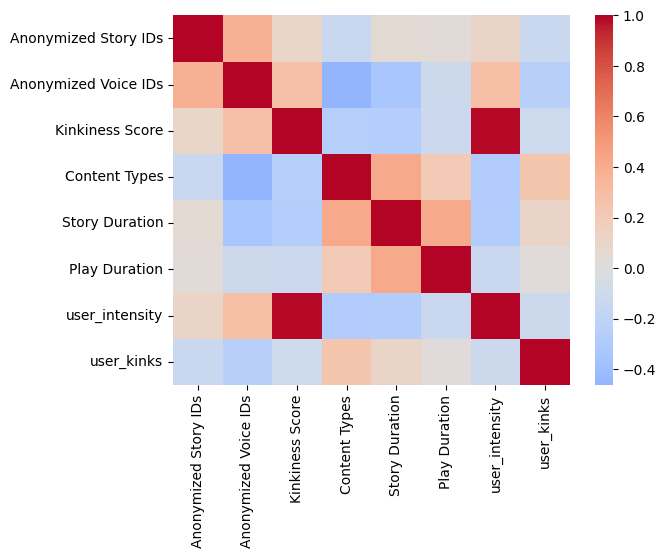

In [53]:
sns.heatmap(df.corr(), center=0, cmap='coolwarm')

<AxesSubplot:>

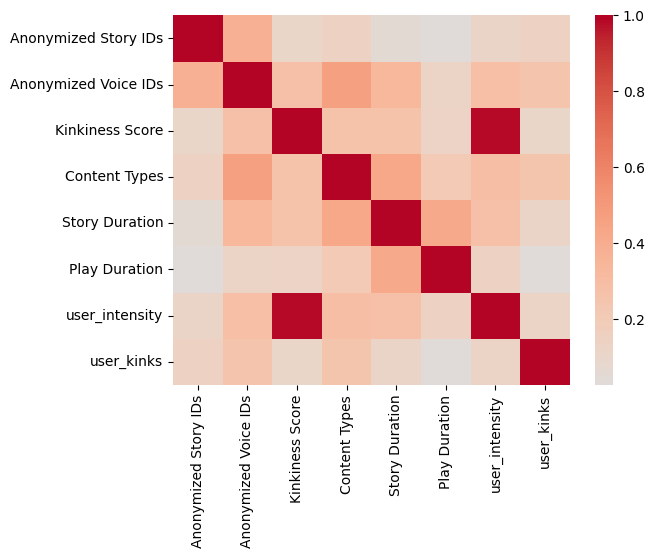

In [52]:
sns.heatmap(df.corr().abs(), center=0, cmap='coolwarm')